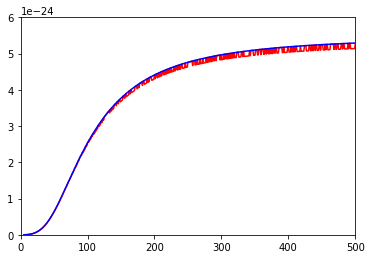

In [2]:
#!/bin/bash
import math
import numpy as np
from scipy import integrate as sp
import matplotlib.pyplot as plt

def trapezoidArea(func, start, end, deviations):
	steps = (end-start) / deviations #Each step will serve as the height for each trapezoid
	a = start #This is the top level of the trapezoid
	b = start + steps #This is the base level of the trapezoid
	trapSum = 0
	while b < end:
		bt = func(a) #Top line
		bb = func(b) #Base line
		trapSum += ((bt + bb) / 2) * steps
		#This is the incremental step in the while loop
		a += steps
		b += steps

	return trapSum

def userFunc(rng, dv=100):
	#dv is the deviations used for the steps
	#Constants used for each calculation
	k = 1.38065*(10**-23) #m^2*kg*s^-2*K^-1
	v = 1*(10**-3) # m^3
	p = 6.022*(10^28) #kg/m^3
	Db = 428 #K

	userAnswers = [] #My answers using the trapezoid function
	scipyAnswers = [] #scipy function for finding the integral

	f = lambda x: ((x**4)*math.exp(x))/((math.exp(x) - 1)**2) #This is the lambda function for the integral part of the function

	for t in rng:
		CV = 9 * v * p * k * ((t**3)/(Db**3)) #This is the first couple factors
		end = Db / t #Ending range of integral
		step = (end - 0) / dv #Steps taken in the integral
		trapAns = trapezoidArea(f, step, end, dv)
		scipyAns = sp.quad(f, 0, end)

		#----------
		userAnswers.append(CV * trapAns) #Save the answer from the trapezoid
		scipyAnswers.append(CV * scipyAns[0]) #Save the answer from the scipy stuff
	
	#Return the content
	return userAnswers, scipyAnswers
	"""CV = 9 * v * p * k * ((t**3)/(Db**3))

	f = lambda x: ((x**4)*math.exp(x))/((math.exp(x) - 1)**2)
	end = Db / t
	step = (end - 0) / dv
	intAns = trapezoidArea(f, step, end, dv)
	print(intAns)
	CV *= intAns
	return CV"""

if __name__ == "__main__":
	numbs = np.arange(5, 501, 1)
	userRes, scipyRes = userFunc(numbs)
	plt.plot(numbs, userRes, "r")
	plt.plot(numbs, scipyRes, "b")
	plt.axis([0, 500, 0, 6*(10**-24)])
	plt.show()

	#This was testing material
	"""answer = userFunc(5, 200)
	print(answer)
	end = 428 / 5
	f = lambda x: ((x**4)*math.exp(x))/((math.exp(x) - 1)**2)
	test = sp.quad(f, 0, end)
	print(test)
	k = 1.38065*(10**-23) #m^2*kg*s^-2*K^-1
	v = 1*(10**-3) # m^3
	p = 6.022*(10^28) #kg/m^3
	Db = 428 #K
	moreT = 9 * v * p * k * ((5**3)/(Db**3))
	print(test[0])
	print(moreT * test[0])"""
	#formula
	#9*v*p*k*((T/Db)**3)int((x**4*e*x)/(e**x-1)**2)[from 0 to Db/T]
	#T is from 5 to 500

